# Granger Causality with Google Trends - Did `itaewon class` cause `โคชูจัง`?

In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rc('font', family='Ayuthaya') # MacOS

In [3]:
#get trend objects with thailand offset 7*60 = 420 minutes
trend = TrendReq(hl='th-TH', tz=420)

In [4]:
#compare 2 keywords
kw_list = ['โคชูจัง','itaewon class']
trend.build_payload(kw_list, geo='TH',timeframe='2020-01-01 2020-04-30')
df = trend.interest_over_time().iloc[:,:2]
df.head()

,โคชูจัง,itaewon class
date,,
2020-01-01,2,0
2020-01-02,1,0
2020-01-03,1,0
2020-01-04,1,0
2020-01-05,1,0


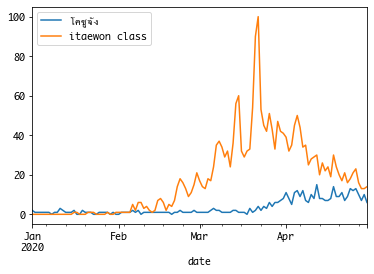

In [5]:
df.plot()

In [6]:
#test for stationarity with augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
test_stat0, p_value0, nb_lag10, _, _, _ = adfuller(df.iloc[:,0])
test_stat1, p_value1, nb_lag1, _, _, _ = adfuller(df.iloc[:,1])

In [7]:
#definitely non-stationary
p_value0, p_value1

(0.9036417740335265, 0.6058227940510107)

In [8]:
diff_df = df.diff(1).dropna()
test_stat0, p_value0, nb_lag10, _, _, _ = adfuller(diff_df.iloc[:,0])
test_stat1, p_value1, nb_lag1, _, _, _ = adfuller(diff_df.iloc[:,1])

In [9]:
#difference is better non-stationary
p_value0, p_value1

(0.056402100647422924, 0.00018616019384220554)

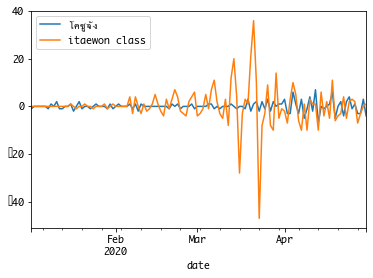

In [10]:
diff_df.plot()

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

#sample with max lags up to 7, 14, 21, 28
#null hypothesis: the coefficients corresponding to past values of the second time series are zero.
res = grangercausalitytests(diff_df, maxlag=[7, 14, 21, 28])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.0058  , p=0.0619  , df_denom=98, df_num=7
ssr based chi2 test:   chi2=16.1893 , p=0.0234  , df=7
likelihood ratio test: chi2=15.1297 , p=0.0344  , df=7
parameter F test:         F=2.0058  , p=0.0619  , df_denom=98, df_num=7

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=2.7201  , p=0.0027  , df_denom=77, df_num=14
ssr based chi2 test:   chi2=52.4237 , p=0.0000  , df=14
likelihood ratio test: chi2=42.5944 , p=0.0001  , df=14
parameter F test:         F=2.7201  , p=0.0027  , df_denom=77, df_num=14

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=4.2609  , p=0.0000  , df_denom=56, df_num=21
ssr based chi2 test:   chi2=158.1842, p=0.0000  , df=21
likelihood ratio test: chi2=94.5126 , p=0.0000  , df=21
parameter F test:         F=4.2609  , p=0.0000  , df_denom=56, df_num=21

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=4.2606  , p=0.0

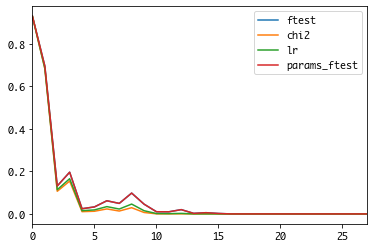

In [12]:
#find the optimal lag
lags = list(range(1,29))
res = grangercausalitytests(diff_df, maxlag=lags, verbose=False)
p_values = []
for i in lags:
    p_values.append({'maxlag':i,
                    'ftest':res[i][0]['ssr_ftest'][1], 
                    'chi2':res[i][0]['ssr_chi2test'][1],
                    'lr':res[i][0]['lrtest'][1],
                    'params_ftest':res[i][0]['params_ftest'][1],})
p_df = pd.DataFrame(p_values)
p_df.iloc[:,1:].plot()

In [28]:
#chicken and eggs
chickeggs = pd.read_csv('chickeggs.csv')
df = chickeggs.iloc[:,1:]
df['chic'] = df.chic /  df.chic[0]
df['egg'] = df.egg /  df.egg[0]

#test if chickens cause eggs
df = df[['egg','chic']]

#test if eggs cause chickens
# df

df

,egg,chic
0,1.000000,1.000000
1,0.986317,0.959982
2,0.929070,0.932387
3,0.908964,0.948840
4,0.881318,0.926244
...,...,...
70,1.971516,0.927845
71,2.003351,0.941510
72,2.030438,0.936940
73,2.035465,0.957858


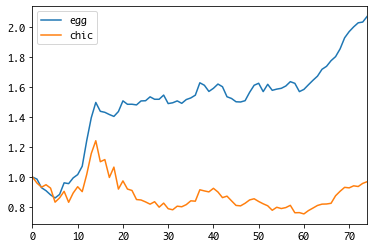

In [29]:
df.plot()

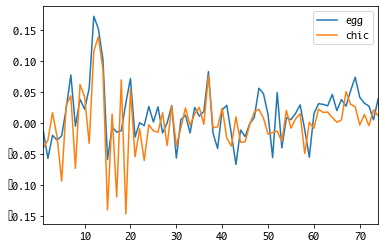

In [30]:
diff_df = df.diff(1).dropna()
diff_df.plot()

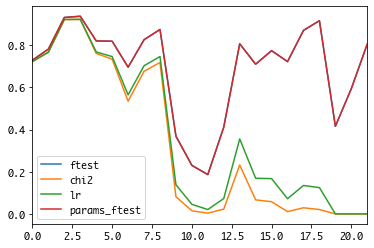

In [31]:
#find the optimal lag
lags = list(range(1,23))
res = grangercausalitytests(diff_df, maxlag=lags, verbose=False)
p_values = []
for i in lags:
    p_values.append({'maxlag':i,
                    'ftest':res[i][0]['ssr_ftest'][1], 
                    'chi2':res[i][0]['ssr_chi2test'][1],
                    'lr':res[i][0]['lrtest'][1],
                    'params_ftest':res[i][0]['params_ftest'][1],})
p_df = pd.DataFrame(p_values)
p_df.iloc[:,1:].plot()